# Selenium 라이브러리 
1. 웹 어플리케이션 테스트를 위한 라이브러리 
2. python에서 웹 브라우져를 제어하기 위해 만들어진 라이브러리 
3. (구버전)인 경우 웹 드라이버라는 별도의 소프트웨어 필요

In [ ]:
# 라이브러리 설치 
!pip install selenium

In [2]:
from selenium import webdriver

In [3]:
# 새로운 웹 브라우져를 생성
driver = webdriver.Chrome()

In [4]:
# 웹 브라우져에 주소를 입력하여 요청을 보낸다.
driver.get("http://www.naver.com")

In [5]:
# html Tag의 속성 값들에 접근하기 위한 기능들을 로드 
from selenium.webdriver.common.by import By
# 키보드 이벤트 리스너(enter키, backspace키, ..)에 접근하기 위한 기능 로드 
from selenium.webdriver.common.keys import Keys

In [6]:
# 네이버의 검색창에 특정 문자열 입력

# 네이버의 검색창이 어떻게 이루어져있는가?
# 네이버의 검색창은 id가 query로 태그가 만들어져있다. 
element = driver.find_element(By.ID, 'query')

In [7]:
# 검색어창에 '아이패드' 입력
element.send_keys('아이패드')

In [8]:
# 키보드의 엔터 이벤트 발생 
element.send_keys(Keys.ENTER)

In [9]:
# class가 _link인 태그를 선택 
element2 = driver.find_element(By.CLASS_NAME, '_link')

In [11]:
# 클릭 이벤트 발생
element2.click()

In [12]:
from bs4 import BeautifulSoup as bs

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/118.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="아이패드 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'아이패드\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'아이패드\'의 네이버 통합검색 결과입니다."> <title>아이패드 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_231019a.c
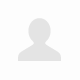
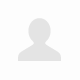

In [13]:
# 부모 탭의 페이지 소스 출력
driver.page_source

In [15]:
# 웹드라이버에 모든 창을 확인 
all_windows = driver.window_handles

In [16]:
# 자식창으로 이동 
driver.switch_to.window(all_windows[1])

'<html lang="ko"><head><meta name="viewport" content="width=device-width"><meta charset="utf-8"><title>아이패드 : 네이버 쇼핑</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/img/favicon.ico"><meta property="og:title" content="아이패드 : 네이버 쇼핑"><meta property="og:image" content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png"><meta property="og:description" content="\'아이패드\'의 네이버쇼핑 검색 결과입니다"><meta name="next-head-count" content="7"><link rel="preconnect" href="https://static.nid.naver.com"><link rel="preconnect" href="https://lcs.naver.com"><link rel="preconnect" href="http://shopping.phinf.naver.net"><link rel="preconnect" href="https://ssl.pstatic.net"><link rel="preconnect" href="https://shopping-phinf.pstatic.net"><link rel="preconnect" href="https://volts.shopping.naver.com"><link rel="preload" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/_next/static/css/cc814b6780774b79.css" as="sty
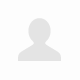
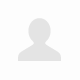

In [17]:
driver.page_source

In [24]:
soup = bs(driver.page_source, 'html.parser')

In [25]:
div_data = soup.find("div", attrs={
    'class' : 'basicList_list_basis__uNBZx'
})

In [26]:
div_data

<div class="basicList_list_basis__uNBZx"><div><div><div class="adProduct_item__1zC9h"><div class="adProduct_inner__W_nuz"><div class="adProduct_img_area__wPZ_E"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z linkAnchor" data-i="86743046039" data-ms="1039504" data-nclick="N=a:lst*A.image,r:8,i:86743046039" href="https://adcr.naver.com/adcr?x=UwUg2PbBEC4CpFK2hoTm/f///w==k6ca8dgc7GcwnARbSo9kamHSaarg3tKcpSn/4TikfI3LS6DOxuXVO7tn9m9n0fHGyl12ifuOO77jrrh4aCZVVRoOWBvuiqtGkdFUDO0HY5M7QjBQycyoG6Dqpi37WjuWxVa6tOHFIV+bFGrxJw9Ec1Bvj4hacYlPzyUw8zt9ICRfZkac/yzC5uey1ACn/rRXZzTC0WUy/YXykKirUGvOWGUVKs0m3lRn/PyoyGYhMJR2K5tTSnm6MQiIW00VIOhmlVhrahOsJfSz7qqTyfwsr/hrtNsc7ECmb9lor7Eakb6UPvmzlBc6YwePz9FN7BdJIlOXQlOvCWOiMsv2he8CAX8FGJ82FZi9NiCkNfoiGaFTUowOvKE34M1y6/jBwRs7l3v6faHK8VQS4vz+242RRvob/BlSN4hpkU4zW7/3dbqoU4R4VZFacRdKPYTspqPE/KYiWYvkeXkhntz+PHdkD5oJc6VxIif6dlCFl0CfuDPth0qnDdkVioAoKO0OKo9bsGBtKhyyyRguQkVAp3tp+vVjfmVgnYeZQa5hxcBbE2qoL1TiV5ZLZS5ag0wWqU6ohNWbcE1dNMJgWisjK

In [27]:
img_list = div_data.find_all('img')

In [28]:
img_list2 = []

for i in img_list:
    # 태그에서 alt속성의 값이 쿠팡이 아닌 데이터는 img_list2에 추가 
    if i['alt'] != '쿠팡':
        img_list2.append(i['src'])

img_list2

['https://searchad-phinf.pstatic.net/MjAyMzA5MTNfODkg/MDAxNjk0NTc0Mzk3NTI4._SNqAgXdyxIR17YP6WegRXlbRQO7XQNxD6p56W9xnLwg.NRN8lxHI6_0Zp9zCIjXHjcSob5XPBiOUhBi1DXMhlm8g.PNG/2546782-fc2dc558-b60b-4904-bd0f-6be0732a9959.png?type=f200',
 'https://searchad-phinf.pstatic.net/MjAyMzA5MTNfMTgy/MDAxNjk0NTc0MjcyNTQx.lvEAK_BzmYKnuqC5xRMNjlhnNEImDLvt3wVI69JAF8Ig.ZdJKbvr6Lhsv6fZJikZjOVRcNzTyHTkEPhWSqAn86lwg.PNG/2546782-439cd113-55a9-47e1-ae42-46521b81d45f.png?type=f200',
 'https://shopping-phinf.pstatic.net/main_3184378/31843780901.67.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3590817/35908175921.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3153084/31530843620.20220705164247.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_2928180/29281800623.20211020120244.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3531799/35317993621.20221118101511.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_8344685/83446859874.2.jpg?type=f140',
 'https://ssl.pstatic.